In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('/Users/Dataset/train_titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.1, random_state=True)

In [9]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
662,1,male,47.0,0,0,25.5875,S
584,3,male,NaN,0,0,8.7125,C
703,3,male,25.0,0,0,7.7417,Q
47,3,female,NaN,0,0,7.7500,Q
868,3,male,NaN,0,0,9.5000,S
...,...,...,...,...,...,...,...
715,3,male,19.0,0,0,7.6500,S
767,3,female,30.5,0,0,7.7500,Q
72,2,male,21.0,0,0,73.5000,S
235,3,female,NaN,0,0,7.5500,S


In [20]:
#1st Imputation Transformer
trf1 = ColumnTransformer([
        ('impute_age',SimpleImputer(),[2]),
        ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
    ],remainder='passthrough')

#2nd One Hot Encoding
trf2 = ColumnTransformer([
        ('ohe_sex_embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'),[1,6])
    ], remainder='passthrough')

#3rd Scaling
trf3 = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0,10))
])

#4th Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

#5th Model
trf5 = DecisionTreeClassifier()

In [27]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5)
])

In [28]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x12e77f400>),
 'trf5': DecisionTreeClassifier()}

In [29]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
pipe.fit(X_train, y_train)

/Users/vilaskhadka/miniconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8, score_func=<function chi2 at 0x12e77f400>)),
                ('trf5', DecisionTreeClassifier())])

In [30]:
y_pred = pipe.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.5888888888888889

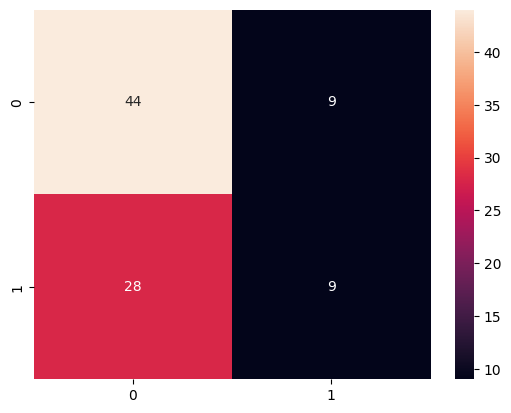

In [33]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);